# Naive Bayesian Classifier
### Q1. Bayes Rule을 이해하고 Naive  Bayes classifier가 사용하는 사후 확률 계산 과정을 서술하세요.

- Bayes Rule:   
$P(w_i|x) = \frac{P(x|w_i)|P(w_i)}{P(x)} = \frac{P(x|w_i) P(w_i)}{\Sigma_j P(x|w_j)P(w_j)}$
  -
  - $P(x|w_i)\text{: 사후 확률, posterior}\\
P(x|w_i) \text{: 가능도/우도, likelihood}\\
P(w_i) \text{: 사전 확률, prior}\\
P(x) \text{: 증거, evidence}$

A1. 위 수식의 표현을 빌리자면 Bayes Rule은 x가 발생했을 때 W_i의 확률이 얼마나 되는지 알아보기 위한 방법이다.

## 1. 수식적 해석

$P(w_i|x) = \frac{P(x \cap w_i)}{P(x)}$

$P(x \cap w_i)=P(x|w_i)*P(w_i)$

$P(x)= \Sigma_j P(x|w_j)P(w_j)$

-

이 때 위와 같은 공식이 성립하므로 Bayes Rule이 성립하게 된다.

$P(w_i|x) = \frac{P(x|w_i)|P(w_i)}{P(x)} = \frac{P(x|w_i) P(w_i)}{\Sigma_j P(x|w_j)P(w_j)}$

-


즉, $P(x)$를 모든 $w_i$와 $x$의 교집합의 확률들의 합으로 나타낸 것이고,

$P(x \cap w_i)$를 $w_i$가 일어나고 $w_i$가 일어났을 때 $x$ 역시 일어날 확률로 표시한 것이라 볼 수 있다.

-

-


## 2. 일상적 해석

예를 들어 친구가 테니스를 치러 갈 때 날씨가 맑을 확률[$P(w_i|x)$]을 계산한다고 가정했을 때, 친구가 테니스를 칠 확률은 증거, 날씨가 맑은 확률은 사전 확률, 날씨가 맑을 때 친구가 테니스를 칠 확률은 사후 확률이 된다.

-

이 때, 친구가 테니스를 칠 확률, $P(x)$는 (각 날씨가 일어날 확률 * 각 날씨에서 친구가 테니스를 칠 확률)을 전부 더하여 구할 수 있다. 즉, 가능도와 사전확률의 곱들의 합을 통해 증거를 구할 수 있다.

-

다음으로, 날씨가 좋고 친구가 테니스도 칠 확률 $P(x \cap w_i)$을 구하기 위해서는 날씨가 좋을 확률 $P(w_i)$와 날씨가 좋을 때 친구가 테니스를 칠 확률 $P(x|w_i)$를 곱하여 구한다. 따라서 $P(x \cap w_i)= P(x|w_i)*P(w_i)$이 성립한다.

-

최종적으로, 친구가 테니스를 칠 확률을 표본 공간으로 두고 날씨가 좋고 친구가 테니스도 칠 사건을 구함으로써 우리가 필요로 하는 확률을 구할 수 있다.


### Q2. Naive Bayes Classification 방법을 이용해서 다음 생성된 리뷰 데이터에 기반한 감정 분석을 해봅시다.

In [41]:
# pip install pandas
import pandas as pd
import re

In [42]:
# 리뷰 데이터 생성
data = {
    'review': [
        'I love this great product! It exceeded my expectations.',
        'The Worst purchase I have ever made. Completely useless.',
        'It is an average product, nothing special but not terrible either.',
        'Great service and who can help but love this design? Highly recommend!',
        'Terrible experience, I will never buy from this poor brand again.',
        'It’s acceptable, but I expected better service, not just an acceptable one.',
        'Absolutely wonderful! I am very satisfied with this great service.',
        'The quality is poor and it broke after one use. Terrible enough!',
        'Acceptable product for the price, but there are better options out there.',
        'Great quality and fast shipping with wonderful service! I love it'
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'neutral', 'positive', 'negative', 'neutral', 'positive',
    ]
}
df = pd.DataFrame(data)
df.head()

,review,sentiment
0,I love this great product! It exceeded my expe...,positive
1,The Worst purchase I have ever made. Completel...,negative
2,"It is an average product, nothing special but ...",neutral
3,Great service and who can help but love this d...,positive
4,"Terrible experience, I will never buy from thi...",negative


In [43]:
# 불용어 리스트 정의
stopwords = ['i', 'my', 'am', 'this', 'it', 'its', 'an', 'a', 'the', 'is', 'are', 'and', 'product', 'service']

In [44]:
# 텍스트 전처리 함수 정의
def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 특수 기호 제거
    text = re.sub(r'[^a-z\s]', '', text)
    # 불용어 제거
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# 모든 리뷰에 대해 전처리 수행
df['review'] = df['review'].apply(preprocess_text)

기본적인 데이터 전처리가 완료되었습니다!
이제부터 직접 나이브 베이지안 분류를 수행해 봅시다.  
우리가 분류하고자 하는 문장은 총 두가지 입니다.  
전처리가 완료되었다고 치고,   
첫번째 문장은 **'love, great, awesome'**,  
두번째 문장은 **'terrible, not, never'** 입니다.

사전 확률 $P(positive), P(negative), P(neutral)$을 구합니다.

In [45]:
df

,review,sentiment
0,love great exceeded expectations,positive
1,worst purchase have ever made completely useless,negative
2,average nothing special but not terrible either,neutral
3,great who can help but love design highly reco...,positive
4,terrible experience will never buy from poor b...,negative
5,acceptable but expected better not just accept...,neutral
6,absolutely wonderful very satisfied with great,positive
7,quality poor broke after one use terrible enough,negative
8,acceptable for price but there better options ...,neutral
9,great quality fast shipping with wonderful love,positive


In [46]:
# 사전 확률 구하는 코드를 작성해주세요.

P_positive = len(df[df['sentiment'] == 'positive']) / len(df)

P_negative = len(df[df['sentiment'] == 'negative']) / len(df)

P_neutral = len(df[df['sentiment'] == 'neutral']) / len(df)

print("P(positive):", P_positive, "\n")
print("P(negative):", P_negative, "\n")
print("P(neutral):", P_neutral)


P(positive): 0.4 

P(negative): 0.3 

P(neutral): 0.3


가능도를 구하기 위한 확률들을 계산합니다.  
예: 첫번째 문장 분류를 위해서는, $P(love|positive), P(great|positive), P(awesome|positive)\\
P(love|negative), P(great|negative), P(awesome|negative)\\
P(love|neutral), P(great|neutral), P(great|neutral)$를 구합니다.

이 때 CountVectorizer를 사용하여 도출한 단어 벡터를 활용하면 확률들을 간편하게 구할 수 있습니다.  
참고: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
review_array = vectorizer.fit_transform(df['review']).toarray()
review_array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

In [48]:
vectorizer.get_feature_names_out()

array(['absolutely', 'acceptable', 'after', 'again', 'average', 'better',
       'brand', 'broke', 'but', 'buy', 'can', 'completely', 'design',
       'either', 'enough', 'ever', 'exceeded', 'expectations', 'expected',
       'experience', 'fast', 'for', 'from', 'great', 'have', 'help',
       'highly', 'just', 'love', 'made', 'never', 'not', 'nothing', 'one',
       'options', 'out', 'poor', 'price', 'purchase', 'quality',
       'recommend', 'satisfied', 'shipping', 'special', 'terrible',
       'there', 'use', 'useless', 'very', 'who', 'will', 'with',
       'wonderful', 'worst'], dtype=object)

In [49]:
vectorizer.vocabulary_

{'love': 28,
 'great': 23,
 'exceeded': 16,
 'expectations': 17,
 'worst': 53,
 'purchase': 38,
 'have': 24,
 'ever': 15,
 'made': 29,
 'completely': 11,
 'useless': 47,
 'average': 4,
 'nothing': 32,
 'special': 43,
 'but': 8,
 'not': 31,
 'terrible': 44,
 'either': 13,
 'who': 49,
 'can': 10,
 'help': 25,
 'design': 12,
 'highly': 26,
 'recommend': 40,
 'experience': 19,
 'will': 50,
 'never': 30,
 'buy': 9,
 'from': 22,
 'poor': 36,
 'brand': 6,
 'again': 3,
 'acceptable': 1,
 'expected': 18,
 'better': 5,
 'just': 27,
 'one': 33,
 'absolutely': 0,
 'wonderful': 52,
 'very': 48,
 'satisfied': 41,
 'with': 51,
 'quality': 39,
 'broke': 7,
 'after': 2,
 'use': 46,
 'enough': 14,
 'for': 21,
 'price': 37,
 'there': 45,
 'options': 34,
 'out': 35,
 'fast': 20,
 'shipping': 42}

In [50]:
frequency_matrix = pd.DataFrame(review_array, columns = vectorizer.get_feature_names_out())
frequency_matrix = pd.concat([df['sentiment'], frequency_matrix], axis=1)
frequency_matrix

,sentiment,absolutely,acceptable,after,again,average,better,brand,broke,but,...,terrible,there,use,useless,very,who,will,with,wonderful,worst
0,positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,negative,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,neutral,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,positive,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,negative,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5,neutral,0,2,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,positive,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
7,negative,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
8,neutral,0,1,0,0,0,1,0,0,1,...,0,2,0,0,0,0,0,0,0,0
9,positive,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [52]:
# 위와 같이 조건부 확률을 구하는 코드를 작성해주세요

total_word= frequency_matrix.drop(columns=['sentiment']).to_numpy().sum() # 데이터에 등장한 유효 단어의 총 개수를 구함

grouped_df = frequency_matrix.groupby('sentiment').sum()
group_sum= grouped_df.sum(axis=1)

# 문장이 아닌 유효 단어별로 긍정, 부정, 중립 확률을 다시 구함

P_positive= group_sum['positive']/total_word
P_negative= group_sum['negative']/total_word
P_neutral= group_sum['neutral']/total_word

print("P(positive):", P_positive, "\n")
print("P(negative):", P_negative, "\n")
print("P(neutral):", P_neutral)

P(positive): 0.35135135135135137 

P(negative): 0.32432432432432434 

P(neutral): 0.32432432432432434


In [53]:
def cal_conditional_prob(word, sentiment):


    # 단어가 데이터에 없는 경우 0을 리턴
    if word not in frequency_matrix.columns:
        count_word_sentiment = 0

    # 인자 값으로 전달된 감정 내에서 해당 단어의 개수를 셈
    else:
        count_word_sentiment = frequency_matrix[frequency_matrix['sentiment'] == sentiment][word].sum()


    # 입력 받은 감정이 데이터에서 총 몇 단어가 나타나는지 셈
    if sentiment == 'positive':
        count_sentiment =  group_sum['positive']
    elif sentiment == 'negative':
        count_sentiment =  group_sum['negative']
    elif sentiment == 'neutral':
        count_sentiment =  group_sum['neutral']


    # 결과값 반환
    return count_word_sentiment / count_sentiment

P_love_positive = cal_conditional_prob('love', 'positive')
P_great_positive = cal_conditional_prob('great', 'positive')
P_awesome_positive =  cal_conditional_prob('awesome', 'positive')

P_love_negative =  cal_conditional_prob('love', 'negative')
P_great_negative =  cal_conditional_prob('great', 'negative')
P_awesome_negative =  cal_conditional_prob('awesome', 'negative')

P_love_neural=  cal_conditional_prob('love', 'neutral')
P_great_neural =  cal_conditional_prob('great', 'neutral')
P_awesome_neural =  cal_conditional_prob('awesome', 'neutral')


P_terribe_positive= cal_conditional_prob('terrible', 'positive')
P_not_positive= cal_conditional_prob('not', 'positive')
P_never_positive= cal_conditional_prob('never', 'positive')

P_terrible_negative= cal_conditional_prob('terrible', 'negative')
P_not_negative= cal_conditional_prob('not', 'negative')
P_never_negative= cal_conditional_prob('never', 'negative')

P_terribel_neural= cal_conditional_prob('terrible', 'neutral')
P_not_neural=  cal_conditional_prob('not', 'neutral')
P_never_neural=  cal_conditional_prob('never', 'neutral')

print("-------")
print("review1")
print("-------","\n")

print("conditional positive probability", "\n\n")
print("P(love | positive):", P_love_positive, "\n")
print("P(great | positive):", P_great_positive, "\n")
print("P(awesome | positive):", P_awesome_positive, "\n\n")

print("conditional negative probability ", "\n\n")
print("P(love | negative):", P_love_negative, "\n")
print("P(great | negative):", P_great_negative, "\n")
print("P(awesome | negative):", P_awesome_negative, "\n\n")

print("conditional neural probability", "\n\n")
print("P(love | neutral):", P_love_neural, "\n")
print("P(great | neutral):", P_great_neural, "\n")
print("P(awesome | neutral):", P_awesome_neural, "\n\n")

print("-------")
print("review2")
print("-------","\n")

print("conditional positive probability", "\n\n")
print("P(terrible | positive):", P_terribe_positive, "\n")
print("P(not | positive):", P_not_positive, "\n")
print("P(never | positive):", P_never_positive, "\n\n")

print("conditional negative probability", "\n\n")
print("P(terrible | negative):", P_terrible_negative, "\n")
print("P(not | negative):", P_not_negative, "\n")
print("P(never | negative):", P_never_negative, "\n\n")

print("conditional neutral probability", "\n\n")
print("P(terrible | neutral):", P_terribel_neural, "\n")
print("P(not | neutral):", P_not_neural, "\n")
print("P(never | neutral):", P_never_neural, "\n")





-------
review1
------- 

conditional positive probability 


P(love | positive): 0.11538461538461539 

P(great | positive): 0.15384615384615385 

P(awesome | positive): 0.0 


conditional negative probability  


P(love | negative): 0.0 

P(great | negative): 0.0 

P(awesome | negative): 0.0 


conditional neural probability 


P(love | neutral): 0.0 

P(great | neutral): 0.0 

P(awesome | neutral): 0.0 


-------
review2
------- 

conditional positive probability 


P(terrible | positive): 0.0 

P(not | positive): 0.0 

P(never | positive): 0.0 


conditional negative probability 


P(terrible | negative): 0.08333333333333333 

P(not | negative): 0.0 

P(never | negative): 0.041666666666666664 


conditional neutral probability 


P(terrible | neutral): 0.041666666666666664 

P(not | neutral): 0.08333333333333333 

P(never | neutral): 0.0 



독립성 가정을 이용하여 가능도(likelihood)를 구합니다.  
첫번째 문장 예시: $P(love, great, awesome|positive), P(love, great, awesome|negative), P(love, great, awesome|neutral)$

In [54]:
# 가능도 구하는 코드를 작성해주세요.




P_target_review1_positive = P_love_positive * P_great_positive * P_awesome_positive
P_target_review1_negative= P_love_negative * P_great_negative * P_awesome_negative
P_target_review1_neutral= P_love_neural * P_great_neural * P_awesome_neural


P_target_review2_positive = P_terribe_positive * P_not_positive * P_never_positive
P_target_review2_negative= P_terrible_negative * P_not_negative * P_never_negative
P_target_review2_neutral=  P_terribel_neural * P_not_neural * P_never_neural


print("-------")
print("review1")
print("-------","\n")

print("P(target_review1 | positive):", P_target_review1_positive, "\n")
print("P(target_review1 | negative):", P_target_review1_negative, "\n")
print("P(target_review1 | neutral):", P_target_review1_neutral, "\n\n")


print("-------")
print("review2")
print("-------","\n")

print("P(target_review2 | positive):", P_target_review2_positive, "\n")
print("P(target_review2 | negative):", P_target_review2_negative, "\n")
print("P(target_review2 | neutral):", P_target_review2_neutral, "\n")

-------
review1
------- 

P(target_review1 | positive): 0.0 

P(target_review1 | negative): 0.0 

P(target_review1 | neutral): 0.0 


-------
review2
------- 

P(target_review2 | positive): 0.0 

P(target_review2 | negative): 0.0 

P(target_review2 | neutral): 0.0 



### 각주
$P(love, great, awesome|positive)=P(love|positive) * P(great|positive) * P(awesome|positive)$

독립성을 가정했을 때 위 수식처럼 계산할 수 있다.

위에서 구한 사전 확률과 가능도를 이용하여 타겟 문장이 positive, negative, neutral일 확률을 구하고 최종적으로 어떤 감성일지 분석해봅니다.

In [55]:
import numpy as np
# 최종 확률 구하는 코드를 작성해주세요.

# 각 문장의 확률
P_target_review1 = P_target_review1_positive * P_positive + P_target_review1_negative * P_negative + P_target_review1_neutral * P_neutral
P_target_review2 = P_target_review2_positive * P_positive + P_target_review2_negative * P_negative + P_target_review2_neutral * P_neutral


# 첫번째 문장
P_positivetarget_review1= P_target_review1_positive * P_positive / P_target_review1

P_negativetarget_review1= P_target_review1_negative * P_negative / P_target_review1

P_neuraltarget_review1= P_target_review1_neutral * P_neutral / P_target_review1

# 두번째 문장

P_positivetarget_review2= P_target_review2_positive * P_positive / P_target_review2

P_negativetarget_review2= P_target_review2_negative * P_negative / P_target_review2

P_neuraltarget_review2= P_target_review2_neutral * P_neutral / P_target_review2


print("-------")
print("review1")
print("-------","\n")

print("P(positive | love, great, awesome):", P_positivetarget_review1, "\n")
print("P(negative | love, great, awesome):", P_negativetarget_review1, "\n")
print("P(neutral | love, great, awesome):", P_neuraltarget_review1, "\n\n")

print("-------")
print("review2")
print("-------","\n")

print("P(positive | terrible, not, never):", P_positivetarget_review2, "\n")
print("P(negative | terrible, not, never):", P_negativetarget_review2, "\n")
print("P(neutral | terrible, not, never):", P_neuraltarget_review2, "\n")


-------
review1
------- 

P(positive | love, great, awesome): nan 

P(negative | love, great, awesome): nan 

P(neutral | love, great, awesome): nan 


-------
review2
------- 

P(positive | terrible, not, never): nan 

P(negative | terrible, not, never): nan 

P(neutral | terrible, not, never): nan 



<ipython-input-55-928ad7704fd7>:10: RuntimeWarning: invalid value encountered in scalar divide
  P_positivetarget_review1= P_target_review1_positive * P_positive / P_target_review1
<ipython-input-55-928ad7704fd7>:12: RuntimeWarning: invalid value encountered in scalar divide
  P_negativetarget_review1= P_target_review1_negative * P_negative / P_target_review1
<ipython-input-55-928ad7704fd7>:14: RuntimeWarning: invalid value encountered in scalar divide
  P_neuraltarget_review1= P_target_review1_neutral * P_neutral / P_target_review1
<ipython-input-55-928ad7704fd7>:18: RuntimeWarning: invalid value encountered in scalar divide
  P_positivetarget_review2= P_target_review2_positive * P_positive / P_target_review2
<ipython-input-55-928ad7704fd7>:20: RuntimeWarning: invalid value encountered in scalar divide
  P_negativetarget_review2= P_target_review2_negative * P_negative / P_target_review2
<ipython-input-55-928ad7704fd7>:22: RuntimeWarning: invalid value encountered in scalar divide
  P_

### 각주

$P(positive|love, great, awesome) = \frac{P(love, great, awesome|positive)|P(positive)}{P(love, great, awesome)} = \frac{P(love, great, awesome|positive)|P(positive)}{\Sigma_j P(love, great, awesome|sentiment_j)P(sentiment_j)}$

위 식이 성립하므로 앞서 제시한 코드대로 최종 확률을 구할 수 있다.

A2-1.   
Target review1의 분류 결과: nan(분모가 0이 되므로 확률을 계산할 수 없다.)   
Target review2의 분류 결과: nan(분모가 0이 되므로 확률을 계산할 수 없다.)

Q2-2. 나이브 베이지안 기반 확률을 구하는 과정에서 어떤 문제점을 발견할 수 있었나요? 그리고 그 문제를 해결하기 위한 방법에 대해 간략하게 조사 및 서술해 주세요. (힌트: Laplace smoothing)

A2-2. 나이브 베이지안 기반 확률을 구할 때, 데이터에 없는 단어가 포함되면 조건부 확률이 0이 된다는 단점이 존재한다. 이는 독립성 가정에 의한 것으로 데이터에 포함되지 않는 단어의 확률이 0으로 처리되면서 데이터에 포함된 단어까지 확률이 0으로 간주되는 문제가 발생한다.

이를 해결하기 위해 Laplace smoothing 방식을 사용할 수 있다.

Laplace smoothing이란 데이터에 포함되지 않은 단어로 인해 베이지안 과정의 확률이 0이 되는 것을 방지하기 위해 라플라스 상수 $\alpha$를 가능도 공식의 분자와 분모에 더해주는 method를 의미한다. 여기서 $\alpha$ 값으로는 주로 1이 사용된다.

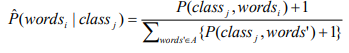

위 공식처럼 분자와 분모항에 1을 더해줌으로써 전체 확률이 0이 되는 것을 방지할 수 있다. 여기서 분모항은 결과적으로 class의 총 개수가 된다. 구체적으로 sentimental analysis에서는 unique word vocabulary(V)를 더해줌으로써 Laplace smoothing 과정을 진행할 수 있다.

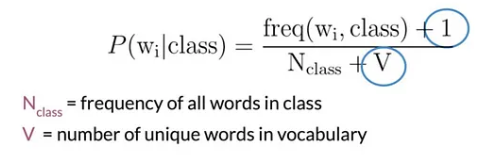



##[참고 문헌]

1. Noto, A. P., & Saputro, D. R. S. (2022). Classification data mining with Laplacian Smoothing on Naïve Bayes method. AIP Conference Proceedings, 2566, 030004. https://doi.org/10.1063/5.0116519

2. Coursesteach, "Natural Language Processing(Part 17)-Laplacian Smoothing", Medium, 2023.11.12 , URL: https://medium.com/@Coursesteach/natural-language-processing-part-17-laplacian-smoothing-7d4be71d0ded, 2024.08.13

In [56]:
# 데이터 내 고유 단어 수(sentiment 열을 제외하면 나머지 열은 전부 고유 단어들이므로 열의 개수에서 1을 빼서 구할 수 있음)

unique_word=frequency_matrix.shape[1]-1


In [57]:
def cal_conditional_prob_la(word, sentiment):

    if word not in frequency_matrix.columns:
        count_word_sentiment = 0

    else:
        count_word_sentiment = frequency_matrix[frequency_matrix['sentiment'] == sentiment][word].sum()

    if sentiment == 'positive':
        count_sentiment =  group_sum['positive']
    elif sentiment == 'negative':
        count_sentiment =  group_sum['negative']
    elif sentiment == 'neutral':
        count_sentiment =  group_sum['neutral']


   # Laplace smoothing 방식을 이용하여 확률이 0이 되지 않도록 함
    return (count_word_sentiment+1) / (count_sentiment+ unique_word)

P_love_positive = cal_conditional_prob_la('love', 'positive')
P_great_positive = cal_conditional_prob_la('great', 'positive')
P_awesome_positive =  cal_conditional_prob_la('awesome', 'positive')

P_love_negative =  cal_conditional_prob_la('love', 'negative')
P_great_negative =  cal_conditional_prob_la('great', 'negative')
P_awesome_negative =  cal_conditional_prob_la('awesome', 'negative')

P_love_neural=  cal_conditional_prob_la('love', 'neutral')
P_great_neural =  cal_conditional_prob_la('great', 'neutral')
P_awesome_neural =  cal_conditional_prob_la('awesome', 'neutral')


P_terribe_positive= cal_conditional_prob_la('terrible', 'positive')
P_not_positive= cal_conditional_prob_la('not', 'positive')
P_never_positive= cal_conditional_prob_la('never', 'positive')

P_terrible_negative= cal_conditional_prob_la('terrible', 'negative')
P_not_negative= cal_conditional_prob_la('not', 'negative')
P_never_negative= cal_conditional_prob_la('never', 'negative')

P_terribel_neural= cal_conditional_prob_la('terrible', 'neutral')
P_not_neural=  cal_conditional_prob_la('not', 'neutral')
P_never_neural=  cal_conditional_prob_la('never', 'neutral')

print("-------")
print("review1")
print("-------","\n")

print("conditional positive probability", "\n\n")
print("P(love | positive):", P_love_positive, "\n")
print("P(great | positive):", P_great_positive, "\n")
print("P(awesome | positive):", P_awesome_positive, "\n\n")

print("conditional negative probability ", "\n\n")
print("P(love | negative):", P_love_negative, "\n")
print("P(great | negative):", P_great_negative, "\n")
print("P(awesome | negative):", P_awesome_negative, "\n\n")

print("conditional neural probability", "\n\n")
print("P(love | neutral):", P_love_neural, "\n")
print("P(great | neutral):", P_great_neural, "\n")
print("P(awesome | neutral):", P_awesome_neural, "\n\n")

print("-------")
print("review2")
print("-------","\n")

print("conditional positive probability", "\n\n")
print("P(terrible | positive):", P_terribe_positive, "\n")
print("P(not | positive):", P_not_positive, "\n")
print("P(never | positive):", P_never_positive, "\n\n")

print("conditional negative probability", "\n\n")
print("P(terrible | negative):", P_terrible_negative, "\n")
print("P(not | negative):", P_not_negative, "\n")
print("P(never | negative):", P_never_negative, "\n\n")

print("conditional neural probability", "\n\n")
print("P(terrible | neutral):", P_terribel_neural, "\n")
print("P(not | neutral):", P_not_neural, "\n")
print("P(never | neutral):", P_never_neural, "\n")

-------
review1
------- 

conditional positive probability 


P(love | positive): 0.05 

P(great | positive): 0.0625 

P(awesome | positive): 0.0125 


conditional negative probability  


P(love | negative): 0.01282051282051282 

P(great | negative): 0.01282051282051282 

P(awesome | negative): 0.01282051282051282 


conditional neural probability 


P(love | neutral): 0.01282051282051282 

P(great | neutral): 0.01282051282051282 

P(awesome | neutral): 0.01282051282051282 


-------
review2
------- 

conditional positive probability 


P(terrible | positive): 0.0125 

P(not | positive): 0.0125 

P(never | positive): 0.0125 


conditional negative probability 


P(terrible | negative): 0.038461538461538464 

P(not | negative): 0.01282051282051282 

P(never | negative): 0.02564102564102564 


conditional neural probability 


P(terrible | neutral): 0.02564102564102564 

P(not | neutral): 0.038461538461538464 

P(never | neutral): 0.01282051282051282 



In [58]:
# Laplace smoothing을 이용하여 가능도를 다시 구함

P_target_review1_positive = P_love_positive * P_great_positive * P_awesome_positive
P_target_review1_negative= P_love_negative * P_great_negative * P_awesome_negative
P_target_review1_neutral= P_love_neural * P_great_neural * P_awesome_neural


P_target_review2_positive = P_terribe_positive * P_not_positive * P_never_positive
P_target_review2_negative= P_terrible_negative * P_not_negative * P_never_negative
P_target_review2_neutral=  P_terribel_neural * P_not_neural * P_never_neural

In [59]:
P_target_review1 = P_target_review1_positive * P_positive + P_target_review1_negative * P_negative + P_target_review1_neutral * P_neutral
P_target_review2 = P_target_review2_positive * P_positive + P_target_review2_negative * P_negative + P_target_review2_neutral * P_neutral


# 첫번째 문장
P_positivetarget_review1= P_target_review1_positive * P_positive / P_target_review1

P_negativetarget_review1= P_target_review1_negative * P_negative / P_target_review1

P_neuraltarget_review1= P_target_review1_neutral * P_neutral / P_target_review1

# 두번째 문장

P_positivetarget_review2= P_target_review2_positive * P_positive / P_target_review2

P_negativetarget_review2= P_target_review2_negative * P_negative / P_target_review2

P_neuraltarget_review2= P_target_review2_neutral * P_neutral / P_target_review2


print("-------")
print("review1")
print("-------","\n")

print("P(positive | love, great, awesome):", P_positivetarget_review1, "\n")
print("P(negative | love, great, awesome):", P_negativetarget_review1, "\n")
print("P(neural | love, great, awesome):", P_neuraltarget_review1, "\n\n")

print("-------")
print("review2")
print("-------","\n")

print("P(positive | terrible, not, never):", P_positivetarget_review2, "\n")
print("P(negative | terrible, not, never):", P_negativetarget_review2, "\n")
print("P(neural | terrible, not, never):", P_neuraltarget_review2, "\n")

-------
review1
------- 

P(positive | love, great, awesome): 0.9094283015329967 

P(negative | love, great, awesome): 0.0452858492335016 

P(neural | love, great, awesome): 0.0452858492335016 


-------
review2
------- 

P(positive | terrible, not, never): 0.07721394308104208 

P(negative | terrible, not, never): 0.46139302845947894 

P(neural | terrible, not, never): 0.46139302845947894 



Laplace smoothing 방식을 이용한 결과 정상적으로 0이 아닌 확률값이 출력되는 것을 확인할 수 있다.